In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#IMPORT DATA AND TAKE A QUICK LOOK:

training = pd.read_csv('C:/Users/hangu/OneDrive/Desktop/github/Projects practice/ProjectPracticing/Titanic - Machine Learning from Disaster/train.csv')
test = pd.read_csv('C:/Users/hangu/OneDrive/Desktop/github/Projects practice/ProjectPracticing/Titanic - Machine Learning from Disaster/test.csv')

training.head()

#Make "add_data" DataFrame:
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])


In [3]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [4]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [5]:
df_num = training[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = training[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

df_num.head()

,Age,SibSp,Parch,Fare
0,22.0,1,0,7.2500
1,38.0,1,0,71.2833
2,26.0,0,0,7.9250
3,35.0,1,0,53.1000
4,35.0,0,0,8.0500


In [6]:
df_cat.head()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
0,0,3,male,A/5 21171,NaN,S
1,1,1,female,PC 17599,C85,C
2,1,3,female,STON/O2. 3101282,NaN,S
3,1,1,female,113803,C123,S
4,0,3,male,373450,NaN,S


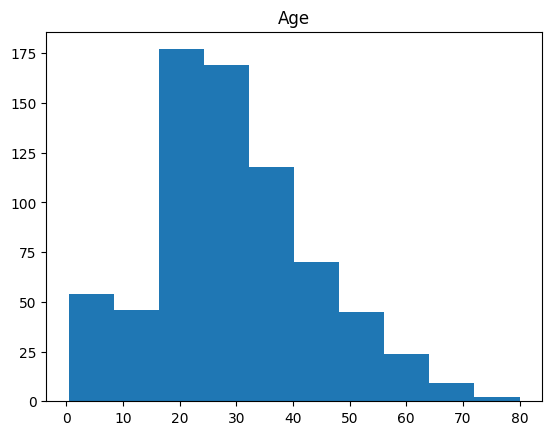

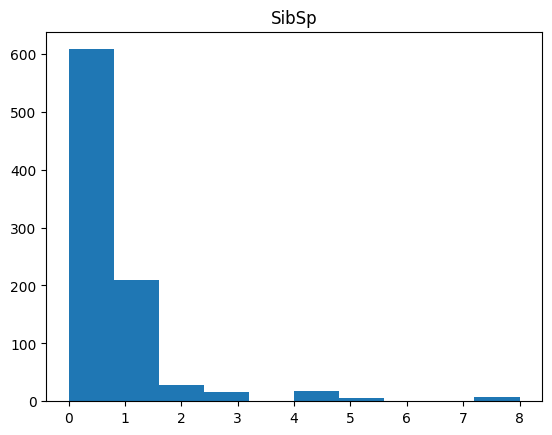

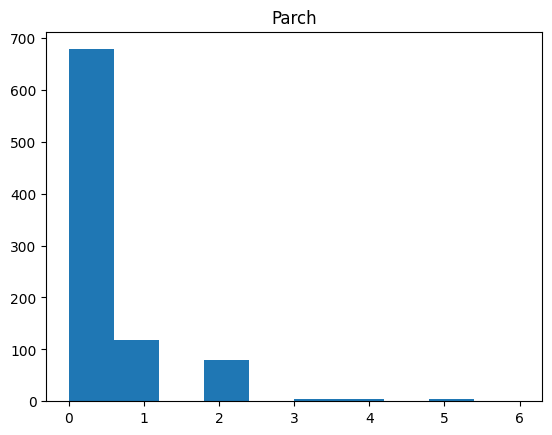

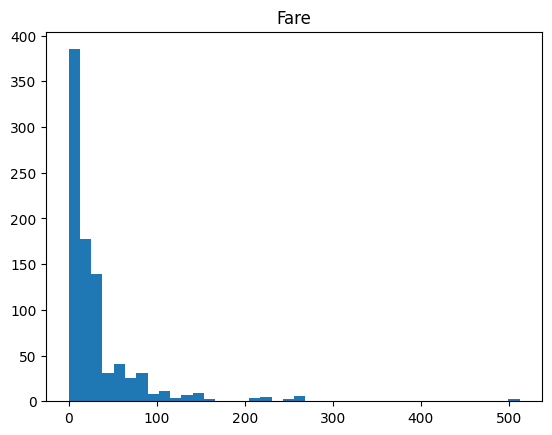

In [7]:
#distributions for all numeric variables 
for i in df_num:
    if i == 'Fare':
        plt.hist(df_num[i], bins=40)
    else:
        plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

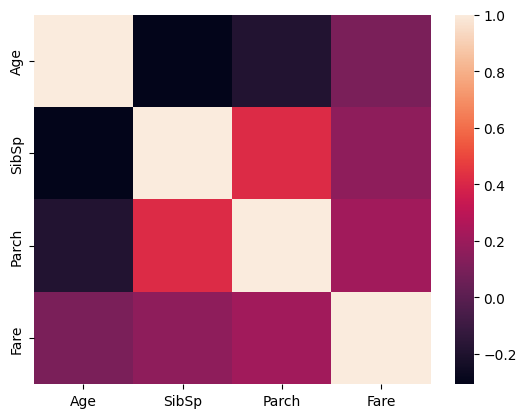

In [8]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [9]:
print(pd.pivot_table(training, index='Survived', values=['Age', 'SibSp', 'Parch', 'Fare']))

                Age       Fare     Parch     SibSp
Survived                                          
0         30.626179  22.117887  0.329690  0.553734
1         28.343690  48.395408  0.464912  0.473684


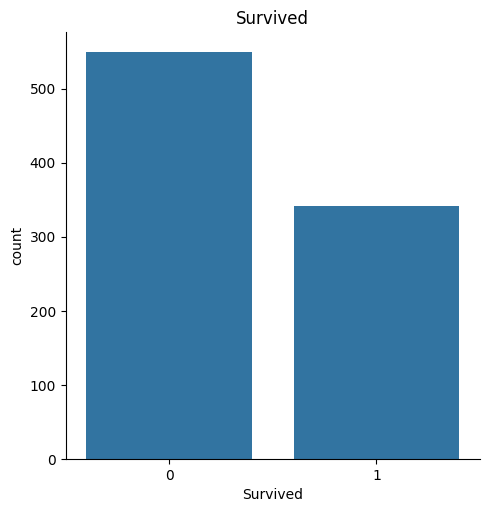

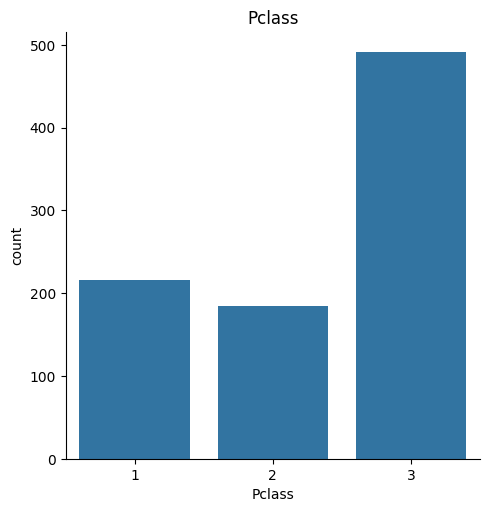

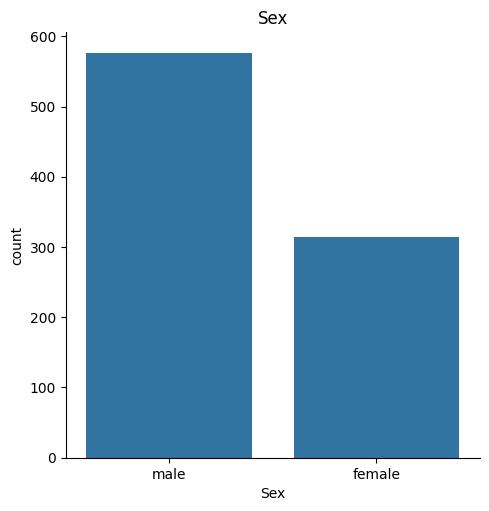

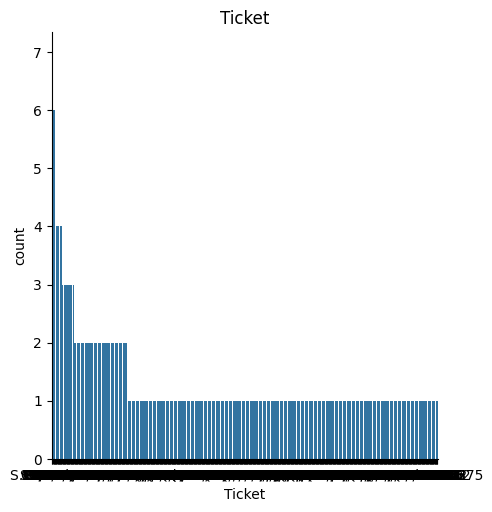

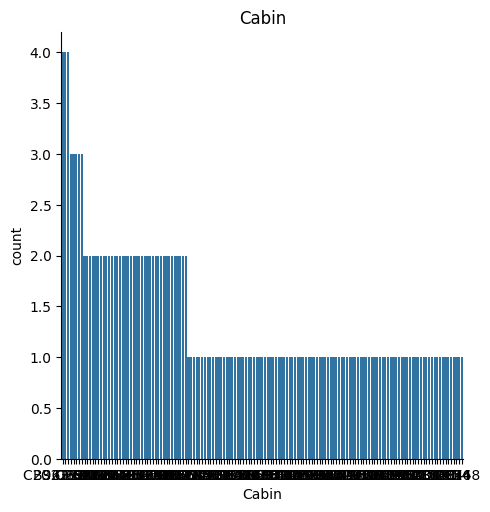

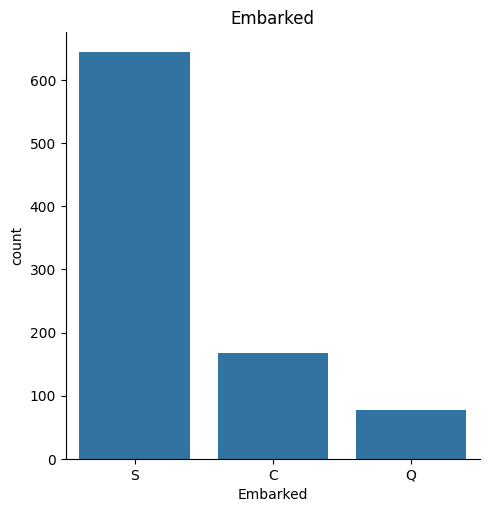

In [10]:
#distributions for all categorical variables 
for i in df_cat.columns:
    df_i = pd.DataFrame(df_cat[i].value_counts())
    sns.catplot(data=df_i, x=i, y='count', kind='bar')
    plt.title(i)
    plt.show()


In [11]:
print(pd.pivot_table(training, index='Survived', columns='Pclass', values='Ticket', aggfunc='count'), "\n")
print(pd.pivot_table(training, index='Survived', columns='Sex', values='Ticket', aggfunc='count'), "\n")
print(pd.pivot_table(training, index='Survived', columns='Embarked', values='Ticket', aggfunc='count'), "\n")

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119 

Sex       female  male
Survived              
0             81   468
1            233   109 

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217 



In [12]:
print(pd.pivot_table(training, index='Pclass', columns='Survived', values='Ticket', aggfunc='count'), "\n")


Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119 



In [13]:
#TAKE A CLOSER LOOK AT "Cabin" COLUMN:

training['cabin_multiple'] = training['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
print(training['cabin_multiple'].value_counts())
training[training['cabin_multiple'] >= 2][['Cabin', 'cabin_multiple']]

cabin_multiple
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64


,Cabin,cabin_multiple
27,C23 C25 C27,3
75,F G73,2
88,C23 C25 C27,3
97,D10 D12,2
118,B58 B60,2
128,F E69,2
297,C22 C26,2
299,B58 B60,2
305,C22 C26,2
311,B57 B59 B63 B66,4


In [14]:
pd.pivot_table(data = training, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count')   

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [15]:
#create categories based on cabin first letter ("n" is for null)
training['cabin_adv'] = training['Cabin'].apply(lambda x: str(x)[0])
training['cabin_adv']

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: cabin_adv, Length: 891, dtype: object

In [16]:
print(training['cabin_adv'].value_counts())
pd.pivot_table(training, index='Survived', columns='cabin_adv', values='Ticket', aggfunc='count')

cabin_adv
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [17]:
#TAKE A CLOSER LOOK AT "Ticket" COLUMN:

training['numeric_ticket'] = training['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
training['ticket_letters'] = training['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/', '').lower()
                                                      if len(x.split(' ')[:-1]) > 0 else 0)
print(training['numeric_ticket'].value_counts(), "\n")
print(training['ticket_letters'].value_counts(), "\n")
training[['Ticket', 'numeric_ticket', 'ticket_letters']]

numeric_ticket
1    661
0    230
Name: count, dtype: int64 

ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64 



,Ticket,numeric_ticket,ticket_letters
0,A/5 21171,0,a5
1,PC 17599,0,pc
2,STON/O2. 3101282,0,stono2
3,113803,1,0
4,373450,1,0
...,...,...,...
886,211536,1,0
887,112053,1,0
888,W./C. 6607,0,wc
889,111369,1,0


In [18]:
pd.pivot_table(training, index='Survived', columns='numeric_ticket', values='Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [19]:
pd.pivot_table(training, index='Survived', columns='ticket_letters', values='Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [20]:
#TAKE A LOOK AT PEOPLE'S TITLES:

training['name_title'] = training['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(training['name_title'].value_counts())
training[['Name', 'name_title']]

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64


,Name,name_title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr
...,...,...
886,"Montvila, Rev. Juozas",Rev
887,"Graham, Miss. Margaret Edith",Miss
888,"Johnston, Miss. Catherine Helen ""Carrie""",Miss
889,"Behr, Mr. Karl Howell",Mr


In [21]:
#DATA PREPROCESSING:

#create similar categorical data for "all_data" DataFrame:

all_data['cabin_multiple'] = all_data['Cabin'].apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['cabin_adv'] = all_data['Cabin'].apply(lambda x: str(x)[0])
all_data['numeric_ticket'] = all_data['Ticket'].apply(lambda x: 1 if x.isnumeric() else 0)
all_data['ticket_letters'] = all_data['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/', '').lower()
                                                      if len(x.split(' ')[:-1]) > 0 else 0)
all_data['name_title'] = all_data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

all_data.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'cabin_multiple', 'cabin_adv', 'numeric_ticket', 'ticket_letters',
       'name_title'],
      dtype='object')

(889,)

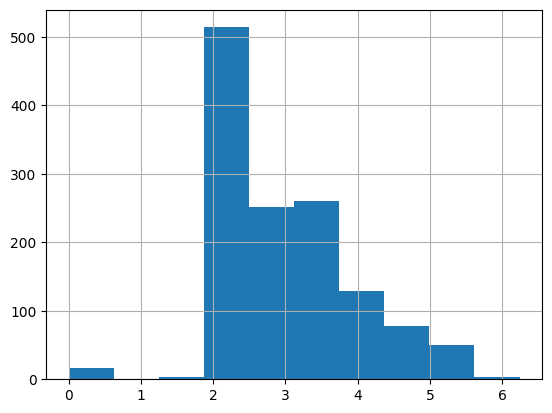

In [22]:
#Impute for continuous data:
all_data['Age'] = all_data['Age'].fillna(training['Age'].median())
all_data['Fare'] = all_data['Fare'].fillna(training['Fare'].median())

#Drop null in "Embarked"
all_data.dropna(subset=['Embarked'], inplace=True)

#log normalized of "Fare"
all_data['norm_fare'] = np.log(all_data['Fare'] + 1)
all_data['norm_fare'].hist()

#Convert Pclass to category:
all_data['Pclass'] = all_data['Pclass'].astype(str)

#Create dummies variables for categories, including only relevant variables:
all_dummies = pd.get_dummies(all_data[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Embarked', 'numeric_ticket', 'cabin_adv', 'cabin_multiple', 'norm_fare', 'name_title', 'train_test']])

#train_test_split:
X_train = all_dummies[all_dummies['train_test']==1].drop('train_test', axis=1)
X_test = all_dummies[all_dummies['train_test']==0].drop('train_test', axis=1)
y_train = all_data[all_data['train_test']==1]['Survived']

y_train.shape

In [23]:
X_train

,Age,SibSp,Parch,numeric_ticket,cabin_multiple,norm_fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,name_title_Master,name_title_Miss,name_title_Mlle,name_title_Mme,name_title_Mr,name_title_Mrs,name_title_Ms,name_title_Rev,name_title_Sir,name_title_the Countess
0,22.0,1,0,0,0,2.110213,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
1,38.0,1,0,0,1,4.280593,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
2,26.0,0,0,0,0,2.188856,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
3,35.0,1,0,1,1,3.990834,True,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,35.0,0,0,1,0,2.202765,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,1,0,2.639057,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
887,19.0,0,0,1,1,3.433987,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
888,28.0,1,2,0,0,3.196630,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
889,26.0,0,0,1,1,3.433987,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [24]:
#Scale data:

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']] = scale.fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch', 'norm_fare']])

X_train_scaled = all_dummies_scaled[all_dummies_scaled['train_test']==1].drop('train_test', axis=1)
X_test_scaled = all_dummies_scaled[all_dummies_scaled['train_test']==0].drop('train_test', axis=1)

In [25]:
#MODEL BUILDING (e.g. Logistic Regression)

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter = 2000)

cv_logreg = cross_val_score(logreg, X_train_scaled, y_train, cv=5)

print(cv_logreg)
print(cv_logreg.mean())

[0.8258427  0.80898876 0.80337079 0.82022472 0.85310734]
0.8223068621849807


In [26]:
#MODEL BUILDING (e.g. Decision Tree)

from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=123)

cv_dt = cross_val_score(dt, X_train_scaled, y_train, cv=5)

print(cv_dt)
print(cv_dt.mean())

[0.75842697 0.78089888 0.8258427  0.76404494 0.81920904]
0.789684504538818


In [27]:
#MODEL BUILDING (e.g. K Nearest Neighbor)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

cv_knn = cross_val_score(knn, X_train_scaled, y_train, cv=5)

print(cv_knn)
print(cv_knn.mean())

[0.79775281 0.79213483 0.83146067 0.79775281 0.85310734]
0.8144416936456548


In [28]:
#MODEL BUILDING (e.g. Voting Classifier)

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('logreg', logreg), ('dt', dt), ('knn',knn)], voting='soft')

cv = cross_val_score(voting_clf, X_train_scaled, y_train, cv=5)

print(cv)
print(cv.mean())

[0.80337079 0.80337079 0.84831461 0.81460674 0.85310734]
0.8245540531962166


In [29]:
#MODEL TUNING: (e.g. Logistic Regression)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_iter' : [2000],
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']
}

clf_logreg = GridSearchCV(logreg, param_grid=param_grid, cv=5, verbose=True, n_jobs=-1)
best_clf_logreg = clf_logreg.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [30]:
print(best_clf_logreg.best_score_, '\n')
print(best_clf_logreg.best_params_)

0.8279375357074843 

{'C': 1.623776739188721, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


In [31]:
#MODEL TUNING: (e.g. K Nearest Neighbor)

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2]
}

clf_knn = GridSearchCV(knn, param_grid=param_grid_knn, cv=5, verbose=True, n_jobs=-1)
best_clf_knn = clf_knn.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [32]:
print(best_clf_knn.best_score_, '\n')
print(best_clf_knn.best_params_)

0.8290611312131023 

{'algorithm': 'ball_tree', 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [33]:
#MODEL TUNING: (e.g. VotingClassifier)

best_logreg = best_clf_logreg.best_estimator_
best_knn = best_clf_knn.best_estimator_

voting_clf_hard = VotingClassifier(estimators=[('logreg', best_logreg), ('knn', best_knn)], voting='hard')
voting_clf_soft = VotingClassifier(estimators=[('logreg', best_logreg), ('knn', best_knn)], voting='soft')

print('voting_clf_hard: ', cross_val_score(voting_clf_hard,X_train_scaled,y_train,cv=5))
print('voting_clf_hard mean: ', cross_val_score(voting_clf_hard,X_train_scaled,y_train,cv=5).mean(), "\n")

print('voting_clf_soft: ', cross_val_score(voting_clf_soft,X_train_scaled,y_train,cv=5))
print('voting_clf_soft mean: ', cross_val_score(voting_clf_soft,X_train_scaled,y_train,cv=5).mean(), "\n")


voting_clf_hard:  [0.83146067 0.81460674 0.82022472 0.81460674 0.86440678]
voting_clf_hard mean:  0.8290611312131023 

voting_clf_soft:  [0.83146067 0.82022472 0.82022472 0.79775281 0.8700565 ]
voting_clf_soft mean:  0.8279438837046911 



In [37]:
#As voting_clf_hard has the best score, let's predict "Survived" people on the "test" set:
voting_clf_hard.fit(X_train_scaled, y_train)
y_pred = voting_clf_hard.predict(X_test_scaled).astype(int)

final_result = pd.DataFrame(data={'PassengerId': test['PassengerId'], 'Survived_pred': y_pred})
print(final_result)


     PassengerId  Survived_pred
0            892              0
1            893              0
2            894              0
3            895              0
4            896              1
..           ...            ...
413         1305              0
414         1306              1
415         1307              0
416         1308              0
417         1309              1

[418 rows x 2 columns]


In [39]:
#test commit